In [82]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q1

In [6]:
# From example/input/ load compustat.csv inside compustat.zip without unzip compustat.zip
import zipfile
# zf = zipfile.ZipFile('compustat.zip')
# df = pd.read_csv(zf.open('compustat.csv'))
df = pd.read_csv('compustat.zip')
df.head()

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0


In [7]:
# Variable names that we are interested in:
# sic code: four digits integer for company
# datecqtr: year/ quarter time for the record
# cusip: compustats identifier for a company
# chod: shares out of standing (in million)
# saleq: sales of current quarter (in million)
# prccq: close price of current quarter (in dollar)
data = df[["sic","datacqtr","cusip","cshoq","saleq","prccq"]]
pd.set_option('precision',2 )

In [10]:
#For saleq and market cap, compute the following:
# Time series mean
# Time Series standard deviation
# Time Series count of missing values
# Time Series ratio of missing values
# add market cap
data['mktcap'] = data['cshoq']*data['prccq']
# Aggregate the result in a dataframe
ts_stat = pd.DataFrame()
ts_stat["mean"] = data[["saleq","mktcap"]].mean()
ts_stat["std"] = data[["saleq","mktcap"]].std()
ts_stat["cnt of missing"] = data[["saleq","mktcap"]].isnull().sum()
ts_stat["ratio of missing"] = ts_stat["cnt of missing"]/len(data)
ts_stat = ts_stat.T
ts_stat

c:\users\康怡安\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,saleq,mktcap
mean,445.15,2057.47
std,2679.71,13202.20
cnt of missing,269498.00,468276.00
ratio of missing,0.15,0.26


In [8]:
data.describe()

,sic,cshoq,saleq,prccq
count,1.81e+06,1.57e+06,1.54e+06,1.47e+06
mean,4.84e+03,1.46e+02,4.45e+02,2.30e+01
std,2.09e+03,4.15e+04,2.68e+03,5.27e+02
min,1.00e+02,0.00e+00,-2.56e+04,0.00e+00
25%,3.31e+03,4.15e+00,3.21e+00,3.00e+00
50%,4.92e+03,1.30e+01,2.18e+01,1.08e+01
75%,6.72e+03,4.24e+01,1.31e+02,2.38e+01
max,1.00e+04,2.60e+07,2.07e+05,1.42e+05


In [11]:
# Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
# Implement some schemes to detect outliers.
# Do you find some outliers? Could you think why? You can do some research using google.
# What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.
from collections import Counter

data1  = data.dropna()

# Outlier detection
def detect_outliers(df, features):
    """
    Takes a dataframe df of features and returns a list of teh indices
    corresponding to teh observations containing more than n outliers according
    to teh Tukey method.
    """
    indices={}
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # quartile spacing (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 3.0 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        indices[col] = outlier_list_col 
    return indices
detect_outliers(data1, ["saleq","prccq","mktcap"])
# there are many outliers

{'saleq': Int64Index([    271,     272,     273,     275,     276,     299,     300,
                 301,     302,     303,
             ...
             1810984, 1810985, 1811183, 1811184, 1811185, 1811186, 1811187,
             1811188, 1811189, 1811190],
            dtype='int64', length=141927),
 'prccq': Int64Index([   1032,    1036,    1040,    1044,    1048,    1052,    1056,
                2388,    2414,    2415,
             ...
             1810820, 1810821, 1810822, 1810823, 1810955, 1810956, 1810957,
             1810958, 1810959, 1810960],
            dtype='int64', length=22818),
 'mktcap': Int64Index([    728,     729,     730,     731,     732,     733,     734,
                 735,     736,     737,
             ...
             1810984, 1810985, 1811183, 1811184, 1811185, 1811186, 1811187,
             1811188, 1811189, 1811190],
            dtype='int64', length=144329)}

# Q2

The defination of HHI index could be found:

https://www.investopedia.com/terms/h/hhi.asp#:~:text=The%20Herfindahl%2DHirschman%20Index%20(HHI)%20is%20a%20commonly%20accepted,close%20to%20zero%20to%2010%2C000.

This index is used to measure the industry concentration and was used by congressman to determine whether to approve a merge deal or not.

Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.

Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

In [60]:
data["sic2"] = data["sic"].apply(lambda x: str(x)[:2])
data1 = data.dropna(subset= ["mktcap","sic"])

c:\users\康怡安\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
data1["tt_mktcap"] = data1.groupby(["datacqtr","sic2"])["mktcap"].transform(sum)
data1["mktshare"]= data1["mktcap"]/data["tt_mktcap"]
HHI= data1.groupby(["datacqtr","sic2"])["mktshare"].apply(lambda x: sum(x**2)).to_frame()
HHI.columns =["HHI"]
HHI.head(10)

c:\users\康怡安\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\康怡安\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


HHI
datacqtr sic2      
1962Q1   45    1.00
         60    0.06
1962Q2   40    0.30
         45    1.00
         60    0.05
1962Q3   40    0.30
         45    1.00
         60    0.06
1962Q4   40    0.30
         45    1.00

In [56]:
# there are some year that has too many missing values and may bias the result.
data[(data["sic2"]=="45") & (data["datacqtr"] =="1963Q1")]

,sic,datacqtr,cusip,cshoq,saleq,prccq,mktcap,sic2,tt_mktcap,mktshare
2282,4512.0,1963Q1,02376R102,8.25,NaN,NaN,NaN,45,100.72,NaN
82276,4512.0,1963Q1,105425102,2.95,NaN,NaN,NaN,45,100.72,NaN
146045,4512.0,1963Q1,21099Y004,2.79,NaN,NaN,NaN,45,100.72,NaN
169098,4512.0,1963Q1,247361702,2.55,NaN,39.5,100.72,45,100.72,1.0
189177,4512.0,1963Q1,276191004,3.23,NaN,NaN,NaN,45,100.72,NaN
232651,4512.0,1963Q1,359076106,0.95,NaN,NaN,NaN,45,100.72,NaN
398720,4512.0,1963Q1,667280408,1.82,NaN,NaN,NaN,45,100.72,NaN
400542,4512.0,1963Q1,632431102,1.86,NaN,NaN,NaN,45,100.72,NaN
434519,4512.0,1963Q1,692632102,1.54,NaN,NaN,NaN,45,100.72,NaN
439548,4512.0,1963Q1,697757102,6.67,NaN,NaN,NaN,45,100.72,NaN


In [62]:
mean_HHI = HHI.groupby("sic2").apply(np.mean)
mean_HHI.sort_values(by="HHI",ascending= False,inplace = True)
mean_HHI.head(4)

,HHI
sic2,
89,1.00
86,1.00
81,0.94
90,0.92


In [87]:
# HHI.reset_index(inplace =True)
topnames =mean_HHI.iloc[0:4,:].index.values
topind = HHI[HHI["sic2"]. isin(topnames)]
topind = pd.pivot_table(topind,index= ["datacqtr"], columns =["sic2"],values=["HHI"])
topind.columns = topnames
topind.head()

,89,86,81,90
datacqtr,,,,
1982Q2,NaN,NaN,NaN,1.0
1982Q3,NaN,NaN,NaN,1.0
1982Q4,NaN,NaN,NaN,1.0
1983Q1,NaN,NaN,NaN,1.0
1983Q2,NaN,NaN,NaN,1.0


In [91]:
import matplotlib.ticker as ticker

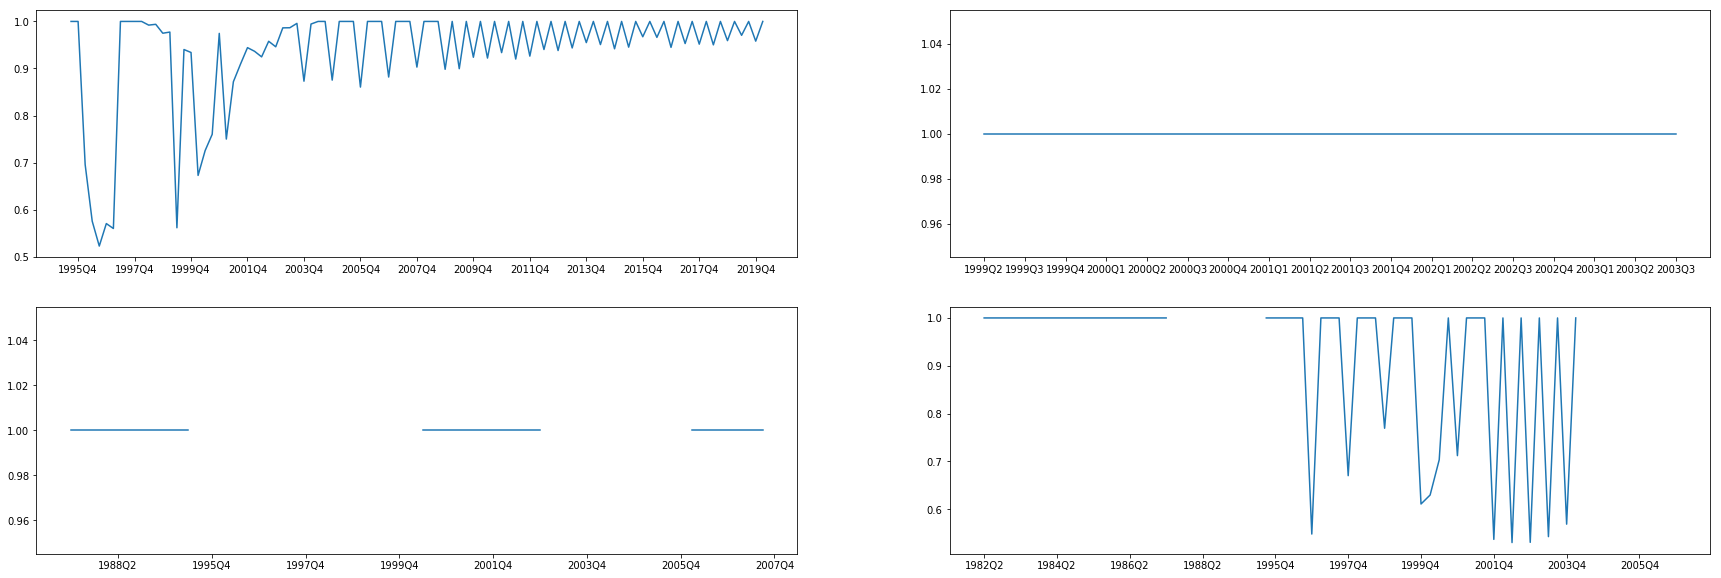

In [94]:
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.plot(topind.index,topind[topnames[0]])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(8))
ax2.plot(topind.index,topind[topnames[1]])
ax3.plot(topind.index,topind[topnames[2]])
ax3.xaxis.set_major_locator(ticker.MultipleLocator(8))
ax4.plot(topind.index,topind[topnames[3]])
ax4.xaxis.set_major_locator(ticker.MultipleLocator(8))